In [1]:
import qutip as qt
import numpy as np
import math
import matplotlib.pyplot as plt
from QuantumBattery import *

Bad key text.latex.preview in file C:\Users\quiri\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution
Bad key mathtext.fallback_to_cm in file C:\Users\quiri\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution
Bad key savefig.jpeg_quality in file C:\Users\quiri\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the default quality parameter.')
You probably

# CS-battery

In [2]:
qb = QuantumBattery_Dicke(Nb=1,Nc=5,m=5,Bz=1,A=1,delta=0,h=1,intern =0)

In [110]:
end =3
steps = 500

dt = end/steps
times = np.linspace(0,end,steps)

psi_b = qb.Hb.eigenstates()[1][0]
psi_c = qb.Hc.eigenstates()[1][1]

results = qt.mesolve(qb.H,psi_b,times,e_ops =[qb.Hb],options=qt.Options(store_states=True))
results_c = qt.mesolve(qb.H,psi_c,times,e_ops =[qb.Hc],options=qt.Options(store_states=True))
states_results = results.states

E = results.expect[0]
E_c = results_c.expect[0]
E_0 = E[0]

In [111]:
S = []
E_p = []

eign_energ = qb.Hb.eigenenergies()

for i,t in enumerate(times):
    
    rh0 = (states_results[i]*states_results[i].dag()).full()
    log_rh0 = np.log2(rh0)
    log_rh0[np.where(log_rh0==float("-inf"))] = 0
    entropy = -qt.Qobj(rh0*log_rh0).tr()
    S.append(entropy)
    
    abs_state = np.abs(states_results[i].full())
    passive_state = qt.Qobj(np.flip(np.sort(abs_state, axis=0)))
    
    rh0_passive = passive_state*passive_state.dag()
    e_p = (rh0_passive*qb.Hb).tr()
    E_p.append(e_p)

C:\Users\quiri\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log2
  if __name__ == "__main__":


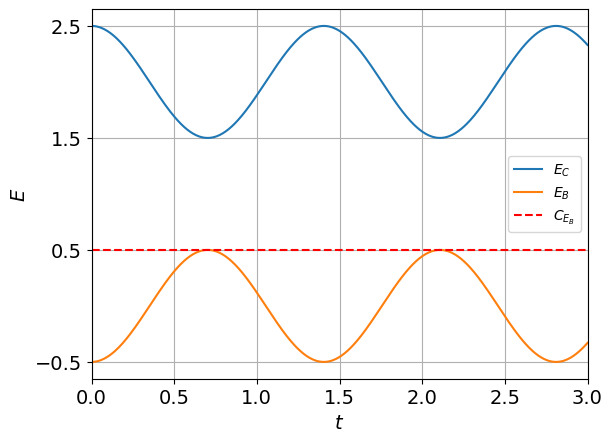

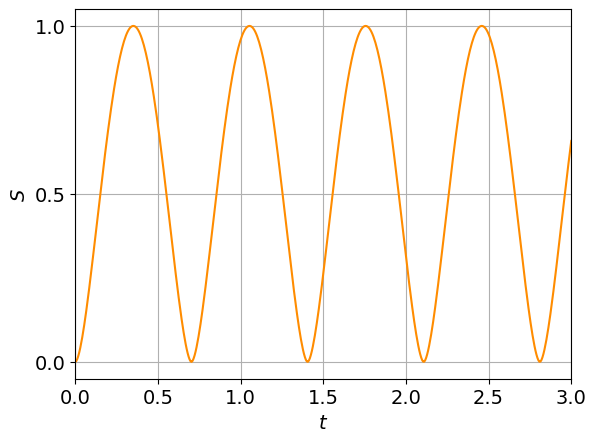

In [112]:
plt.plot(times,E_c, label = "$E_C$")
plt.plot(times,E, label = "$E_B$")
plt.grid()
plt.axhline(y=0.5, color='r', linestyle='--', label = "$C_{E_B}$")
plt.xlabel("$t$", size = 14)
plt.xlim((0,3))
plt.ylabel("$E$",size = 14)
plt.xticks(fontsize=14)
plt.yticks(np.arange(-0.5, 3, step=1),fontsize=14)
plt.legend()
plt.savefig("CS-battery_energy_1")
plt.show()

plt.plot(times,S, label = "Entropy", color = "darkorange")
plt.xlabel("$t$", size = 14)
plt.xlim((0,3))
plt.ylabel("$S$",size = 14)
plt.xticks(fontsize=14)
plt.yticks(np.arange(0, 1.5, step=0.5),fontsize=14)
plt.grid()
plt.savefig("CS-battery_entropy_1")
plt.show()

5-2

In [113]:
qb = QuantumBattery_Dicke(Nb=2,Nc=5,m=5,Bz=1,A=1,delta=0,h=1,intern =0)

In [114]:
end =3
steps = 500

dt = end/steps
times = np.linspace(0,end,steps)

psi_b = qb.Hb.eigenstates()[1][0]
psi_c = qb.Hc.eigenstates()[1][2]

results = qt.mesolve(qb.H,psi_b,times,e_ops =[qb.Hb],options=qt.Options(store_states=True))
results_c = qt.mesolve(qb.H,psi_c,times,e_ops =[qb.Hc],options=qt.Options(store_states=True))
states_results = results.states

E = results.expect[0]
E_c = results_c.expect[0]
E_0 = E[0]

In [115]:
S = []
E_p = []

eign_energ = qb.Hb.eigenenergies()

for i,t in enumerate(times):
    
    rh0 = (states_results[i]*states_results[i].dag()).full()
    log_rh0 = np.log2(rh0)
    log_rh0[np.where(log_rh0==float("-inf"))] = 0
    entropy = -qt.Qobj(rh0*log_rh0).tr()
    S.append(entropy)
    
    abs_state = np.abs(states_results[i].full())
    passive_state = qt.Qobj(np.flip(np.sort(abs_state, axis=0)))
    
    rh0_passive = passive_state*passive_state.dag()
    e_p = (rh0_passive*qb.Hb).tr()
    E_p.append(e_p)

C:\Users\quiri\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log2
  if __name__ == "__main__":


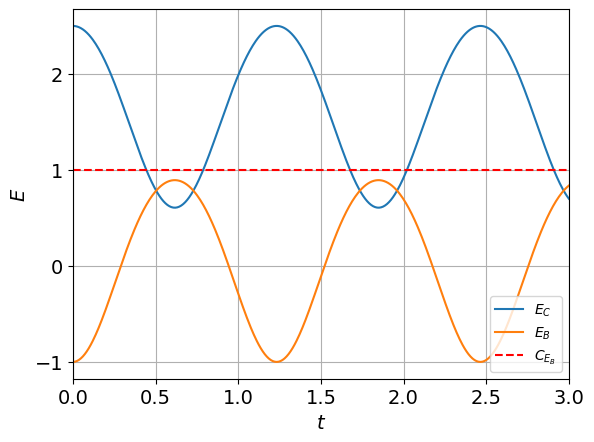

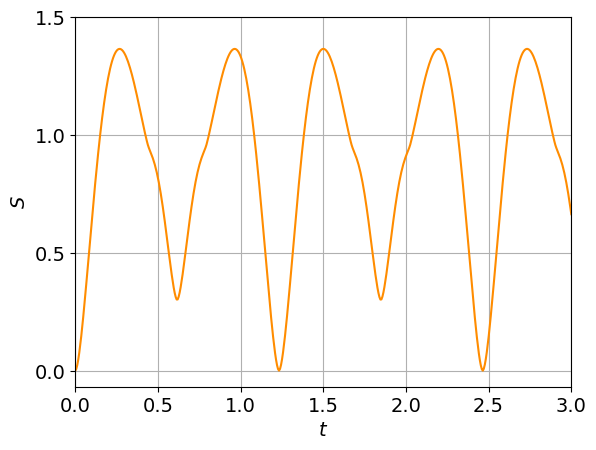

In [116]:
plt.plot(times,E_c, label = "$E_C$")
plt.plot(times,E, label = "$E_B$")
plt.grid()
plt.axhline(y=1, color='r', linestyle='--', label = "$C_{E_B}$")
plt.xlabel("$t$", size = 14)
plt.ylabel("$E$",size = 14)
plt.xticks(fontsize=14)
plt.xlim((0,3))
plt.yticks(np.arange(-1, 3, step=1),fontsize=14)
plt.legend()
plt.savefig("CS-battery_energy_5_2")
plt.show()

plt.plot(times,S, label = "Entropy", color = "darkorange")
plt.xlabel("$t$", size = 14)
plt.xlim((0,3))
plt.ylabel("$S$",size = 14)
plt.xticks(fontsize=14)
plt.yticks(np.arange(0, 2, step=0.5),fontsize=14)
plt.grid()
plt.savefig("CS-battery_entropy_5_2")
plt.show()

**2-2**

In [117]:
qb = QuantumBattery_Dicke(Nb=2,Nc=2,m=2,Bz=1,A=1,delta=0,h=1,intern =0)

In [118]:
end =3
steps = 500

dt = end/steps
times = np.linspace(0,end,steps)

psi_b = qb.Hb.eigenstates()[1][0]
psi_c = qb.Hc.eigenstates()[1][qb.m]

results = qt.mesolve(qb.H,psi_b,times,e_ops =[qb.Hb],options=qt.Options(store_states=True))
results_c = qt.mesolve(qb.H,psi_c,times,e_ops =[qb.Hc],options=qt.Options(store_states=True))
states_results = results.states

E = results.expect[0]
E_c = results_c.expect[0]
E_0 = E[0]

In [119]:
S = []
E_p = []

eign_energ = qb.Hb.eigenenergies()

for i,t in enumerate(times):
    
    rh0 = (states_results[i]*states_results[i].dag()).full()
    log_rh0 = np.log2(rh0)
    log_rh0[np.where(log_rh0==float("-inf"))] = 0
    entropy = -qt.Qobj(rh0*log_rh0).tr()
    S.append(entropy)
    
    abs_state = np.abs(states_results[i].full())
    passive_state = qt.Qobj(np.flip(np.sort(abs_state, axis=0)))
    
    rh0_passive = passive_state*passive_state.dag()
    e_p = (rh0_passive*qb.Hb).tr()
    E_p.append(e_p)

C:\Users\quiri\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log2
  if __name__ == "__main__":


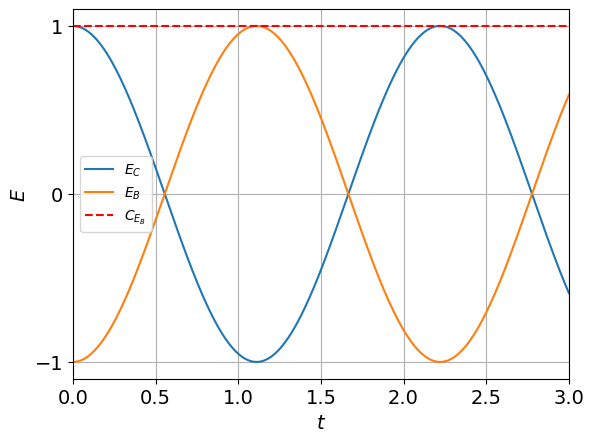

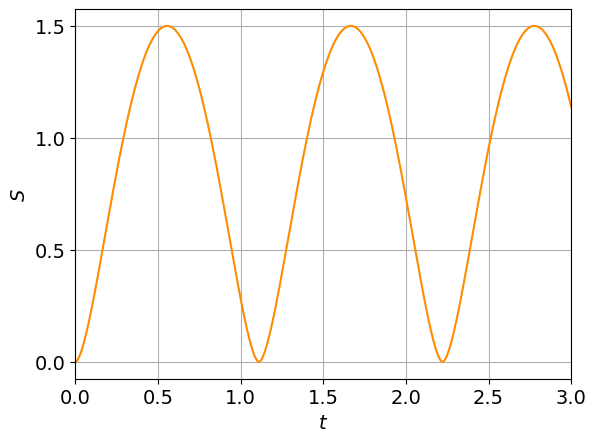

In [120]:
plt.plot(times,E_c, label = "$E_C$")
plt.plot(times,E, label = "$E_B$")
plt.grid()
plt.axhline(y=1, color='r', linestyle='--', label = "$C_{E_B}$")
plt.xlabel("$t$", size = 14)
plt.ylabel("$E$",size = 14)
plt.xticks(fontsize=14)
plt.xlim((0,3))
plt.yticks(np.arange(-1, 1.5, step=1),fontsize=14)
plt.legend()
plt.savefig("CS-battery_energy_2")
plt.show()

plt.plot(times,S, label = "Entropy", color = "darkorange")
plt.xlabel("$t$", size = 14)
plt.xlim((0,3))
plt.ylabel("$S$",size = 14)
plt.xticks(fontsize=14)
plt.yticks(np.arange(0, 2, step=0.5),fontsize=14)
plt.grid()
plt.savefig("CS-battery_entropy_2")
plt.show()

**5-5**

In [13]:
qb = QuantumBattery_Dicke(Nb=5,Nc=5,m=5,Bz=1,A=1,delta=0,h=1,intern =0)

In [14]:
end =math.pi**2
steps = 500

dt = end/steps
times = np.linspace(0,end,steps)

psi_b = qb.Hb.eigenstates()[1][0]
psi_c = qb.Hb.eigenstates()[1][qb.m]

results = qt.mesolve(qb.H,psi_b,times,e_ops =[qb.Hb],options=qt.Options(store_states=True))
results_c = qt.mesolve(qb.H,psi_c,times,e_ops =[qb.Hc],options=qt.Options(store_states=True))
states_results = results.states

E = results.expect[0]
E_c = results_c.expect[0]
E_0 = E[0]

In [15]:
S = []
E_p = []

eign_energ = qb.Hb.eigenenergies()

for i,t in enumerate(times):
    
    rh0 = (states_results[i]*states_results[i].dag()).full()
    log_rh0 = np.log2(rh0)
    log_rh0[np.where(log_rh0==float("-inf"))] = 0
    entropy = -qt.Qobj(rh0*log_rh0).tr()
    S.append(entropy)
    
    abs_state = np.abs(states_results[i].full())
    passive_state = qt.Qobj(np.flip(np.sort(abs_state, axis=0)))
    
    rh0_passive = passive_state*passive_state.dag()
    e_p = (rh0_passive*qb.Hb).tr()
    E_p.append(e_p)

C:\Users\quiri\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log2
  if __name__ == "__main__":


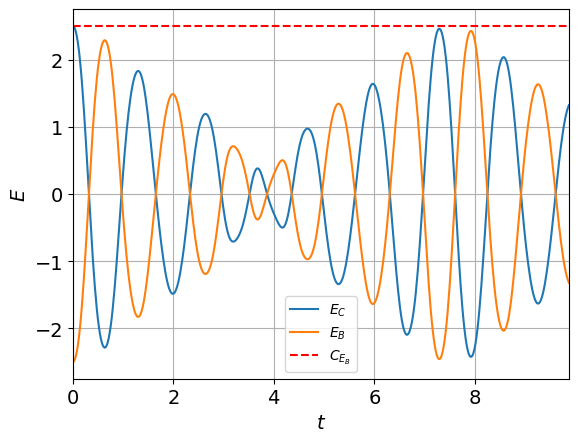

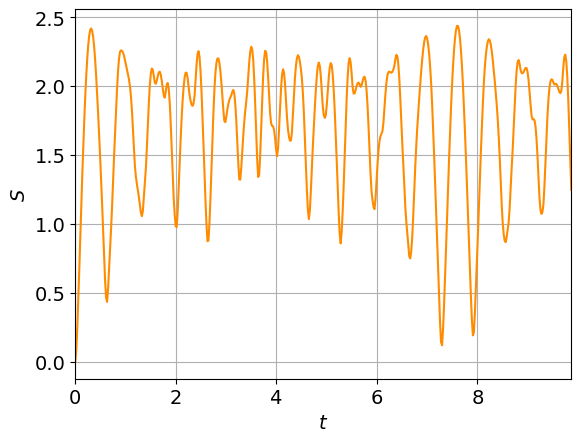

2.4240150735634995


In [16]:
plt.plot(times,E_c, label = "$E_C$")
plt.plot(times,E, label = "$E_B$")
plt.grid()
plt.axhline(y=2.5, color='r', linestyle='--', label = "$C_{E_B}$")
plt.xlabel("$t$", size = 14)
plt.ylabel("$E$",size = 14)
plt.xticks(np.arange(0,end,2),fontsize=14)
plt.xlim((0,end))
plt.yticks(fontsize=14)
plt.legend()
plt.savefig("CS-battery_energy_5")
plt.show()

plt.plot(times,S, label = "Entropy", color = "darkorange")
plt.xlabel("$t$", size = 14)
plt.xlim((0,end))
plt.ylabel("$S$",size = 14)
plt.xticks(np.arange(0,end,2),fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.savefig("CS-battery_entropy_5")
plt.show()
print(max(E))

3-3

In [17]:
N=3
qb = QuantumBattery_Dicke(Nb=N,Nc=N,m=N,Bz=1,A=1,delta=0,h=1,intern =0)

In [18]:
end =math.pi**2
steps = 1000

dt = end/steps
times = np.linspace(0,end,steps)

psi_b = qb.Hb.eigenstates()[1][0]
psi_c = qb.Hb.eigenstates()[1][qb.m]

results = qt.mesolve(qb.H,psi_b,times,e_ops =[qb.Hb],options=qt.Options(store_states=True))
results_c = qt.mesolve(qb.H,psi_c,times,e_ops =[qb.Hc],options=qt.Options(store_states=True))
states_results = results.states

E = results.expect[0]
E_c = results_c.expect[0]
E_0 = E[0]

In [19]:
S = []
E_p = []

eign_energ = qb.Hb.eigenenergies()

for i,t in enumerate(times):
    
    rh0 = (states_results[i]*states_results[i].dag()).full()
    log_rh0 = np.log2(rh0)
    log_rh0[np.where(log_rh0==float("-inf"))] = 0
    entropy = -qt.Qobj(rh0*log_rh0).tr()
    S.append(entropy)
    
    abs_state = np.abs(states_results[i].full())
    passive_state = qt.Qobj(np.flip(np.sort(abs_state, axis=0)))
    
    rh0_passive = passive_state*passive_state.dag()
    e_p = (rh0_passive*qb.Hb).tr()
    E_p.append(e_p)

C:\Users\quiri\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log2
  if __name__ == "__main__":


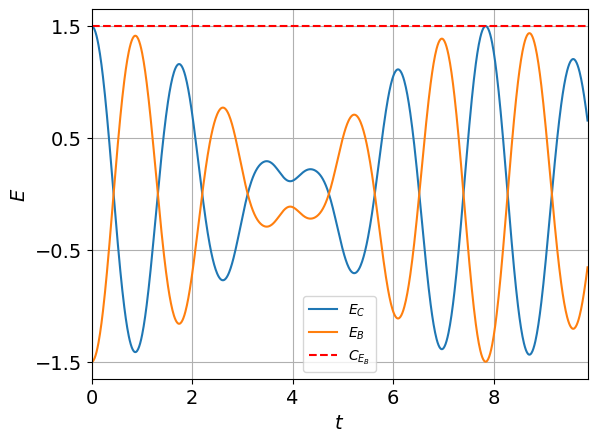

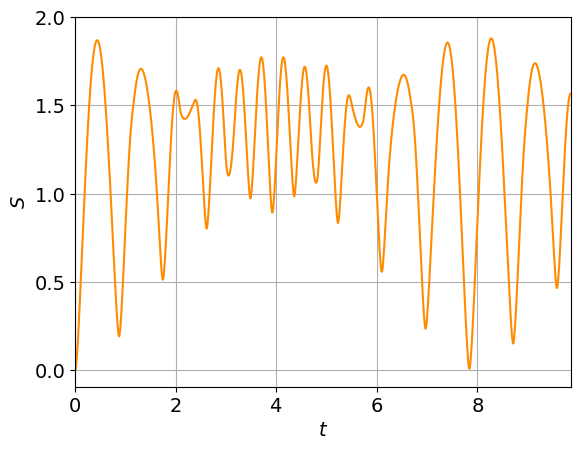

1.435087490540685


In [20]:
plt.plot(times,E_c, label = "$E_C$")
plt.plot(times,E, label = "$E_B$")
plt.grid()
plt.axhline(y=1.5, color='r', linestyle='--', label = "$C_{E_B}$")
plt.xlabel("$t$", size = 14)
plt.xlim((0,end))
plt.ylabel("$E$",size = 14)
plt.xticks(fontsize=14)
plt.yticks(np.arange(-1.5, 2, step=1),fontsize=14)
plt.legend()
plt.savefig("CS-battery_energy_3")
plt.show()

plt.plot(times,S, label = "Entropy", color = "darkorange")
plt.xlabel("$t$", size = 14)
plt.ylabel("$S$",size = 14)
plt.xticks(fontsize=14)
plt.xlim((0,end))
plt.yticks(np.arange(0, 2.5, step=0.5),fontsize=14)
plt.grid()
plt.savefig("CS-battery_entropy_3")
plt.show()
print(max(E))

*3-3*

100-100

In [21]:
qb = QuantumBattery_Dicke(Nb=100,Nc=100,m=100,Bz=1,A=1,delta=0,h=1,intern =0)

In [26]:
end =math.pi**2
steps = 1000

dt = end/steps
times = np.linspace(0,end,steps)

psi_b = qb.Hb.eigenstates()[1][0]
psi_c = qb.Hb.eigenstates()[1][qb.m]

results = qt.mesolve(qb.H,psi_b,times,e_ops =[qb.Hb],options=qt.Options(store_states=True))
results_c = qt.mesolve(qb.H,psi_c,times,e_ops =[qb.Hc],options=qt.Options(store_states=True))
states_results = results.states

E = results.expect[0]
E_c = results_c.expect[0]
E_0 = E[0]

In [27]:
S = []
E_p = []

eign_energ = qb.Hb.eigenenergies()

for i,t in enumerate(times):
    
    rh0 = (states_results[i]*states_results[i].dag()).full()
    log_rh0 = np.log2(rh0)
    log_rh0[np.where(log_rh0==float("-inf"))] = 0
    entropy = -qt.Qobj(rh0*log_rh0).tr()
    S.append(entropy)
    
    abs_state = np.abs(states_results[i].full())
    passive_state = qt.Qobj(np.flip(np.sort(abs_state, axis=0)))
    
    rh0_passive = passive_state*passive_state.dag()
    e_p = (rh0_passive*qb.Hb).tr()
    E_p.append(e_p)

C:\Users\quiri\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log2
  if __name__ == "__main__":


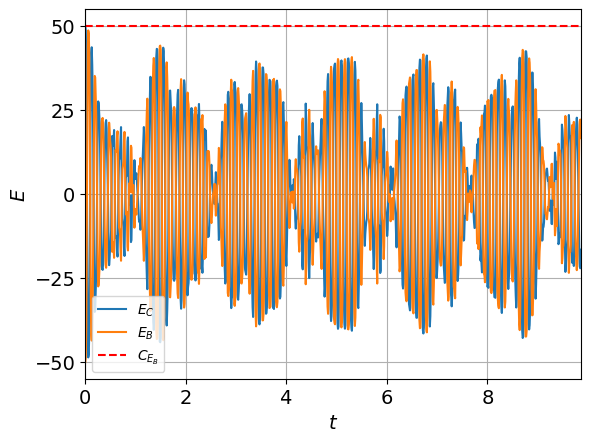

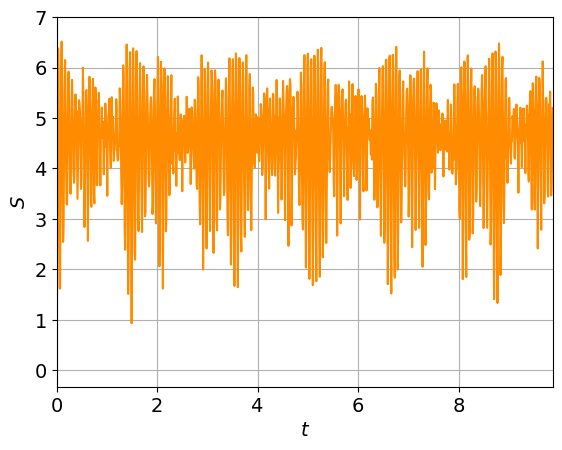

48.65944028547813


In [28]:
plt.plot(times,E_c, label = "$E_C$")
plt.plot(times,E, label = "$E_B$")
plt.grid()
plt.axhline(y=50, color='r', linestyle='--', label = "$C_{E_B}$")
plt.xlabel("$t$", size = 14)
plt.ylabel("$E$",size = 14)
plt.xticks(np.arange(0, end, step=2),fontsize=14)
plt.xlim((0,end))
plt.yticks(np.arange(-50, 60, step=25),fontsize=14)
plt.legend()
plt.savefig("CS-battery_energy_100")
plt.show()

plt.plot(times,S, label = "Entropy", color = "darkorange")
plt.xlabel("$t$", size = 14)
plt.xlim((0,end))
plt.ylabel("$S$",size = 14)
plt.xticks(np.arange(0, end, step=2),fontsize=14)
plt.yticks(np.arange(0, 8, step=1),fontsize=14)
plt.grid()
plt.savefig("CS-battery_entropy_100")
plt.show()
print(max(E))

# CST-battery

**2-1-2**

In [134]:
steps_pp = 0.01


n_periods = 4

on_of_list = [(-1,0),(0,-1),(-1,0),(0,-1)]
end_p_list = [1.11,1.11,1.11,1.11]


qb = QuantumBattery_2(Nc=2,Ni=1,Nb=2,m=2,B_c=1,B_i=1,B_b=1,A_ci=1,delta_ci=0,A_ib=1,delta_ib=0)
m = 2**qb.m-1

psi_c = qb.Hc.eigenstates()[1][m]
psi_i = qb.Hi.eigenstates()[1][0]#+qb.Hi.eigenstates()[1][1]).unit()
psi_b = qb.Hb.eigenstates()[1][0]

psi = qt.tensor(psi_c,psi_i,psi_b).unit()

Ec_0 = np.real((psi.dag()*qb.Hc_N*psi).full()[0])
Ei_0 = np.real((psi.dag()*qb.Hi_N*psi).full()[0])
Eb_0 = np.real((psi.dag()*qb.Hb_N*psi).full()[0])

Ec_list = [Ec_0]
Ei_list = [Ei_0]
Eb_list = [Eb_0]
    
states_results = []


for i in range(n_periods):
    
    A_ci = on_of_list[i][0]
    A_ib = on_of_list[i][1]
    
    qb = QuantumBattery_2(Nc=2,Ni=1,Nb=2,m=2,B_c=1,B_i=1,B_b=1,A_ci=A_ci,delta_ci=0,A_ib=A_ib,delta_ib=0)
    
    period = np.arange(0,end_p_list[i],steps_pp)
    
    results_c = qt.mesolve(qb.H,psi,period,[],e_ops =[qb.Hc_N],options=qt.Options(store_states=True))
    results_i = qt.mesolve(qb.H,psi,period,[],e_ops =[qb.Hi_N],options=qt.Options(store_states=True))
    results_b = qt.mesolve(qb.H,psi,period,[],e_ops =[qb.Hb_N],options=qt.Options(store_states=True))
    
    states_results+=results_c.states
    
    Ec_list.append(np.array(results_c.expect[0]))
    Ei_list.append(np.array(results_i.expect[0]))
    Eb_list.append(np.array(results_b.expect[0]))
    
    psi = results_c.states[-1]
    
Ec_list = Ec_list[1:]
Ei_list = Ei_list[1:]
Eb_list = Eb_list[1:]

E_c = np.concatenate(Ec_list)
E_i = np.concatenate(Ei_list)
E_b = np.concatenate(Eb_list)

In [135]:
S_c = []
S_b = []

for t in range(len(E_c)):
    rh0_c = states_results[t].ptrace(range(qb.Nc))
    S_c.append(qt.entropy_vn(rh0_c,base=2))
    
    rh0_b = states_results[t].ptrace(range(qb.Nc+qb.Ni,qb.N))
    S_b.append(qt.entropy_vn(rh0_b,base=2))

in  4.44 time
maximal energy battery:  0.9999935524296797


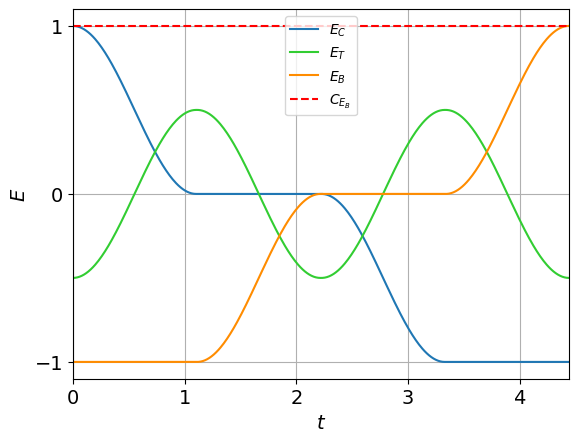

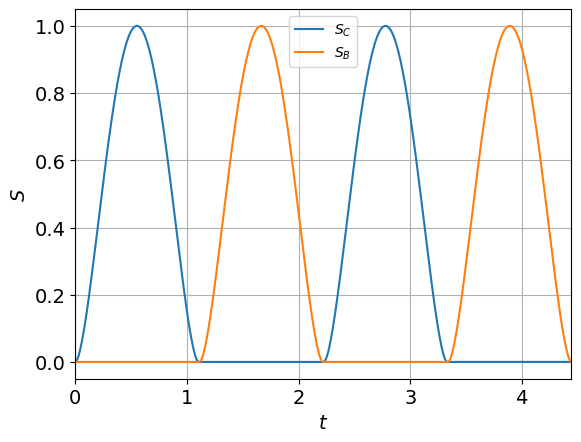

In [136]:
end = np.sum(end_p_list)
times = np.linspace(0,end,len(E_c))
print("in ", end, "time")
print("maximal energy battery: ", np.max(E_b))

plt.plot(times,E_c, label = "$E_C$")
plt.plot(times,E_i, label = "$E_T$", color = "limegreen")
plt.plot(times,E_b, label = "$E_B$", color = "darkorange")
plt.axhline(y=1, color='r', linestyle='--', label = "$C_{E_B}$")
plt.grid()
plt.xlabel("$t$", size = 14)
plt.xlim((0,4.44))
plt.ylabel("$E$",size = 14)
plt.xticks(np.arange(0, 5, step=1),fontsize=14)
plt.yticks(np.arange(-1, 1.5, step=1),fontsize=14)
plt.legend()
plt.savefig("energy_trans_battery_212")
plt.show()

plt.plot(times,S_c,label="$S_C$")
plt.plot(times,S_b,label="$S_B$")
plt.grid()
plt.xlabel("$t$", size = 14)
plt.xlim((0,4.44))
plt.ylabel("$S$", size=14)
plt.xticks(np.arange(0, 5, step=1),fontsize=14)
plt.yticks(fontsize=14)
plt.legend()
plt.savefig("entropy_trans_battery_212")
plt.show()

5-1-2

In [137]:
qb_dick = QuantumBattery_Dicke(Nb=2,Nc=1,m=1,Bz=1,A=1,delta=0,h=1,intern =0)
dE = abs(qb_dick.H.eigenenergies()[0]-qb_dick.H.eigenenergies()[1])
math.pi/dE

1.1107207345395915

In [138]:
end_p_list = [0.702,1.111,0.555,1.111]
on_of_list = [(1,0),(0,1),(1,0),(0,1)]

In [139]:
steps_pp = 0.001


n_periods = len(end_p_list)

qb = CST_QB_Dicke(Nc=5,Nt=1,Nb=2,m=5,A1=1,A2=1)

psi_c = qb.Hc.eigenstates()[1][5]
psi_t = qb.Ht.eigenstates()[1][0]#+qb.Hi.eigenstates()[1][1]).unit()
psi_b = qb.Hb.eigenstates()[1][0]

psi = qt.tensor(psi_c,psi_t,psi_b).unit()

Ec_0 = np.real((psi.dag()*qb.Hc_N*psi).full()[0])
Et_0 = np.real((psi.dag()*qb.Ht_N*psi).full()[0])
Eb_0 = np.real((psi.dag()*qb.Hb_N*psi).full()[0])

Ec_list = [Ec_0]
Et_list = [Et_0]
Eb_list = [Eb_0]
    
states_results = []

for i in range(n_periods):
    
    A1_ = on_of_list[i][0]
    A2_ = on_of_list[i][1]
    
    qb = CST_QB_Dicke(Nc=5,Nt=1,Nb=2,m=5,A1=A1_,A2=A2_)
    period = np.arange(0,end_p_list[i],steps_pp)
    
    results_c = qt.mesolve(qb.H,psi,period,[],e_ops =[qb.Hc_N],options=qt.Options(store_states=True))
    results_t = qt.mesolve(qb.H,psi,period,[],e_ops =[qb.Ht_N],options=qt.Options(store_states=True))
    results_b = qt.mesolve(qb.H,psi,period,[],e_ops =[qb.Hb_N],options=qt.Options(store_states=True))
    
    states_results+=results_b.states
    
    Ec_list.append(np.array(results_c.expect[0]))
    Et_list.append(np.array(results_t.expect[0]))
    Eb_list.append(np.array(results_b.expect[0]))
    
    psi = results_b.states[-1]
    
Ec_list = Ec_list[1:]
Et_list = Et_list[1:]
Eb_list = Eb_list[1:]

E_c = np.concatenate(Ec_list)
E_t = np.concatenate(Et_list)
E_b = np.concatenate(Eb_list)

In [140]:
S_c = []
S_b = []

for i in range(len(E_c)):
     
    rh0_c = (states_results[i].ptrace([0])).full()
    log_rh0_c = np.log2(rh0_c)
    log_rh0_c[np.where(log_rh0_c==float("-inf"))] = 0
    entropy_c = -qt.Qobj(rh0_c*log_rh0_c).tr()
    S_c.append(entropy_c)
    
    rh0_b = (states_results[i].ptrace([2])).full()
    log_rh0_b = np.log2(rh0_b)
    log_rh0_b[np.where(log_rh0_b==float("-inf"))] = 0
    entropy_b = -qt.Qobj(rh0_b*log_rh0_b).tr()
    S_b.append(entropy_b)

    

C:\Users\quiri\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log2
  import sys
C:\Users\quiri\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log2
  del sys.path[0]


in  3.479 time
maximal energy battery:  0.9999569164405091


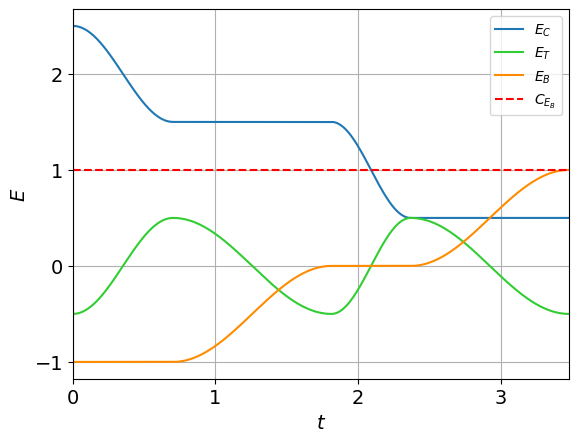

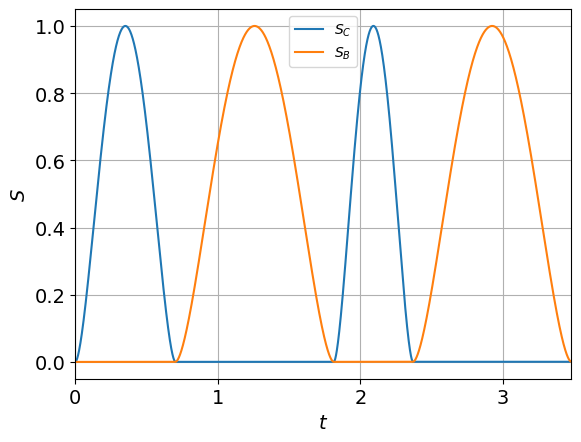

In [141]:
end = np.sum(end_p_list)
times = np.linspace(0,end,len(E_c))
print("in ", end, "time")
print("maximal energy battery: ", np.max(E_b))

plt.plot(times,E_c, label = "$E_C$")
plt.plot(times,E_t, label = "$E_T$", color = "limegreen")
plt.plot(times,E_b, label = "$E_B$", color = "darkorange")
plt.axhline(y=1, color='r', linestyle='--', label = "$C_{E_B}$")
plt.grid()
plt.xlabel("$t$", size = 14)
plt.xlim((0,3.479))
plt.ylabel("$E$",size = 14)
plt.xticks(np.arange(0, 3.479, step=1),fontsize=14)
plt.yticks(np.arange(-1, 3, step=1),fontsize=14)
plt.legend()
plt.savefig("energy_trans_battery_512")
plt.show()

plt.plot(times,S_c,label="$S_C$")
plt.plot(times,S_b,label="$S_B$")
plt.grid()
plt.xlabel("$t$", size = 14)
plt.xlim((0,3.479))
plt.ylabel("$S$", size=14)
plt.xticks(np.arange(0, 3.479, step=1),fontsize=14)
plt.yticks(np.arange(0,1.2,0.2),fontsize=14)
plt.legend()
plt.savefig("entropy_trans_battery_512")
plt.show()

3-1-3

In [151]:
N = 3

end_p_list = []
on_of_list = []

for i in range(N):
    qb_dick = QuantumBattery_Dicke(Nb=1,Nc=N,m=N-i,Bz=1,A=1,delta=0,h=1,intern =0)
    dE = abs(qb_dick.H.eigenenergies()[0]-qb_dick.H.eigenenergies()[1])
    end_p_list+=[round(math.pi/dE,4)]*2
    on_of_list+=[(1,0),(0,1)]

In [152]:
steps_pp = 0.001

n_periods = len(end_p_list)

qb = CST_QB_Dicke(Nc=N,Nt=1,Nb=N,m=N,A1=1,A2=1)

psi_c = qb.Hc.eigenstates()[1][N]
psi_t = qb.Ht.eigenstates()[1][0]#+qb.Hi.eigenstates()[1][1]).unit()
psi_b = qb.Hb.eigenstates()[1][0]

psi = qt.tensor(psi_c,psi_t,psi_b).unit()

Ec_0 = np.real((psi.dag()*qb.Hc_N*psi).full()[0])
Et_0 = np.real((psi.dag()*qb.Ht_N*psi).full()[0])
Eb_0 = np.real((psi.dag()*qb.Hb_N*psi).full()[0])

Ec_list = [Ec_0]
Et_list = [Et_0]
Eb_list = [Eb_0]
    
states_results = []

for i in range(n_periods):
    
    A1_ = on_of_list[i][0]
    A2_ = on_of_list[i][1]
    
    qb = CST_QB_Dicke(Nc=N,Nt=1,Nb=N,m=N,A1=A1_,A2=A2_)
    period = np.arange(0,end_p_list[i],steps_pp)
    
    results_c = qt.mesolve(qb.H,psi,period,[],e_ops =[qb.Hc_N],options=qt.Options(store_states=True))
    results_t = qt.mesolve(qb.H,psi,period,[],e_ops =[qb.Ht_N],options=qt.Options(store_states=True))
    results_b = qt.mesolve(qb.H,psi,period,[],e_ops =[qb.Hb_N],options=qt.Options(store_states=True))
    
    states_results+=results_b.states
    
    Ec_list.append(np.array(results_c.expect[0]))
    Et_list.append(np.array(results_t.expect[0]))
    Eb_list.append(np.array(results_b.expect[0]))
    
    psi = results_b.states[-1]
    
Ec_list = Ec_list[1:]
Et_list = Et_list[1:]
Eb_list = Eb_list[1:]

E_c = np.concatenate(Ec_list)
E_t = np.concatenate(Et_list)
E_b = np.concatenate(Eb_list)

In [153]:
S_c = []
S_b = []

for i in range(len(E_c)):
     
    rh0_c = (states_results[i].ptrace([0])).full()
    log_rh0_c = np.log2(rh0_c)
    log_rh0_c[np.where(log_rh0_c==float("-inf"))] = 0
    entropy_c = -qt.Qobj(rh0_c*log_rh0_c).tr()
    S_c.append(entropy_c)
    
    rh0_b = (states_results[i].ptrace([2])).full()
    log_rh0_b = np.log2(rh0_b)
    log_rh0_b[np.where(log_rh0_b==float("-inf"))] = 0
    entropy_b = -qt.Qobj(rh0_b*log_rh0_b).tr()
    S_b.append(entropy_b)

    

C:\Users\quiri\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log2
  import sys
C:\Users\quiri\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log2
  del sys.path[0]


in  5.1984 time
maximal energy battery:  1.499980003874307


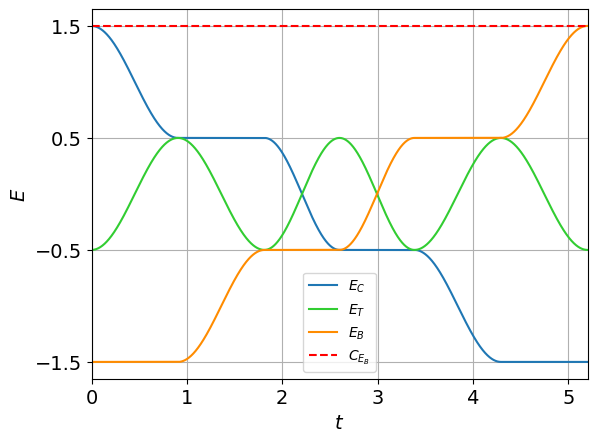

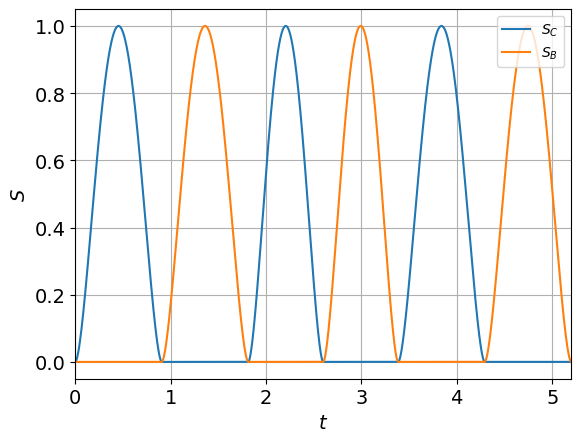

In [156]:
end = np.sum(end_p_list)
times = np.linspace(0,end,len(E_c))
print("in ", end, "time")
print("maximal energy battery: ", np.max(E_b))

plt.plot(times,E_c, label = "$E_C$")
plt.plot(times,E_t, label = "$E_T$", color = "limegreen")
plt.plot(times,E_b, label = "$E_B$", color = "darkorange")
plt.axhline(y=1.5, color='r', linestyle='--', label = "$C_{E_B}$")
plt.grid()
plt.xlabel("$t$", size = 14)
plt.xlim((0,5.2))
plt.ylabel("$E$",size = 14)
plt.xticks(np.arange(0, 6, step=1),fontsize=14)
plt.yticks(np.arange(-1.5, 2, step=1),fontsize=14)
plt.legend()
plt.savefig("energy_trans_battery_313")
plt.show()

plt.plot(times,S_c,label="$S_C$")
plt.plot(times,S_b,label="$S_B$")
plt.grid()
plt.xlabel("$t$", size = 14)
plt.xlim((0,5.2))
plt.ylabel("$S$", size=14)
plt.xticks(np.arange(0, 6, step=1),fontsize=14)
plt.yticks(np.arange(0,1.2,0.2),fontsize=14)
plt.legend(loc="upper right")
plt.savefig("entropy_trans_battery_313")
plt.show()

5-1-5 wrong

In [56]:
steps_pp = 0.001


on_of_list = [(1,0),(0,1),(1,0),(0,1),(1,0),(0,1),(1,0),(0,1),(1,0),(0,1),(1,0),(0,1)]
end_p_list = [0.662,0.662,0.515,0.515,0.484,0.484,0.515,0.515,0.662,0.662,0.515,0.515]

n_periods = len(end_p_list)

qb = QuantumBattery_2(Nc=5,Ni=1,Nb=5,m=5,B_c=1,B_i=1,B_b=1,A_ci=1,delta_ci=0,A_ib=1,delta_ib=0)
m = 2**qb.m-1

psi_c = qb.Hc.eigenstates()[1][m]
psi_i = qb.Hi.eigenstates()[1][0]#+qb.Hi.eigenstates()[1][1]).unit()
psi_b = qb.Hb.eigenstates()[1][0]

psi = qt.tensor(psi_c,psi_i,psi_b).unit()

Ec_0 = np.real((psi.dag()*qb.Hc_N*psi).full()[0])
Ei_0 = np.real((psi.dag()*qb.Hi_N*psi).full()[0])
Eb_0 = np.real((psi.dag()*qb.Hb_N*psi).full()[0])

Ec_list = [Ec_0]
Ei_list = [Ei_0]
Eb_list = [Eb_0]
    
states_results = []

for i in range(n_periods):
    
    A_ci = on_of_list[i][0]
    A_ib = on_of_list[i][1]
    
    qb = QuantumBattery_2(Nc=5,Ni=1,Nb=5,m=5,B_c=1,B_i=1,B_b=1,A_ci=A_ci,delta_ci=0,A_ib=A_ib,delta_ib=0)
    
    period = np.arange(0,end_p_list[i],steps_pp)
    
    results_c = qt.mesolve(qb.H,psi,period,[],e_ops =[qb.Hc_N],options=qt.Options(store_states=True))
    results_i = qt.mesolve(qb.H,psi,period,[],e_ops =[qb.Hi_N],options=qt.Options(store_states=True))
    results_b = qt.mesolve(qb.H,psi,period,[],e_ops =[qb.Hb_N],options=qt.Options(store_states=True))
    
    states_results+=results_c.states
    
    Ec_list.append(np.array(results_c.expect[0]))
    Ei_list.append(np.array(results_i.expect[0]))
    Eb_list.append(np.array(results_b.expect[0]))
    
    psi = results_c.states[-1]
    
Ec_list = Ec_list[1:]
Ei_list = Ei_list[1:]
Eb_list = Eb_list[1:]

E_c = np.concatenate(Ec_list)
E_i = np.concatenate(Ei_list)
E_b = np.concatenate(Eb_list)

In [57]:
S_c = []
S_b = []

for t in range(len(E_c)):
    rh0_c = states_results[t].ptrace(range(qb.Nc))
    S_c.append(qt.entropy_vn(rh0_c,base=2))
    
    rh0_b = states_results[t].ptrace(range(qb.Nc+qb.Ni,qb.N))
    S_b.append(qt.entropy_vn(rh0_b,base=2))

in  6.7059999999999995 time
maximal energy battery:  2.208204828144219


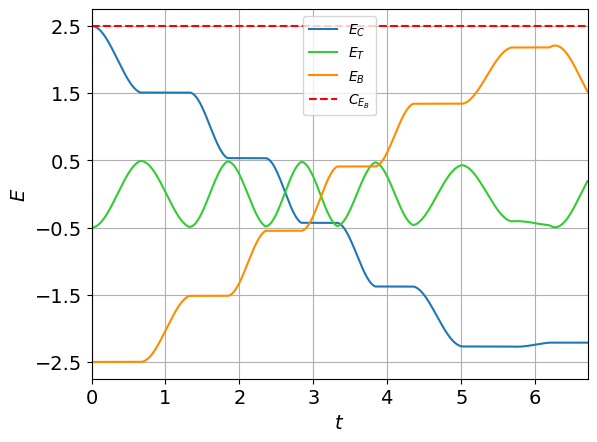

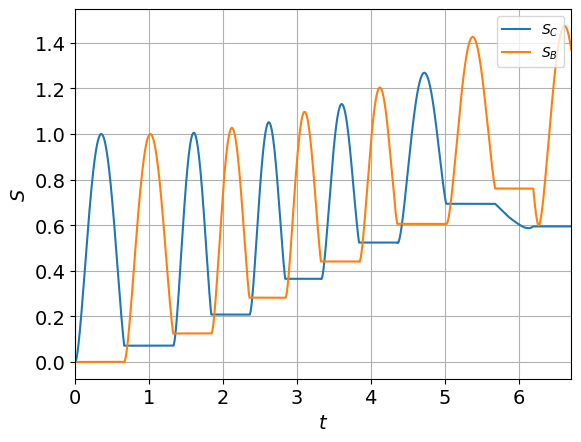

In [58]:
end = np.sum(end_p_list)
times = np.linspace(0,end,len(E_c))
print("in ", end, "time")
print("maximal energy battery: ", np.max(E_b))

plt.plot(times,E_c, label = "$E_C$")
plt.plot(times,E_i, label = "$E_T$", color = "limegreen")
plt.plot(times,E_b, label = "$E_B$ ", color = "darkorange")
plt.axhline(y=2.5, color='r', linestyle='--', label = "$C_{E_B}$")
plt.grid()
plt.xlabel("$t$",size = 14)
plt.ylabel("$E$", size = 14)
plt.xlim((0,end))
plt.xticks(fontsize=14)
plt.yticks(np.arange(-2.5,3,1),fontsize=14)
plt.legend()
plt.savefig("energy_trans_battery_515_wrong")
plt.show()

plt.plot(times,S_c,label="$S_C$")
plt.plot(times,S_b,label="$S_B$")
plt.xlabel("$t$", size = 14)
plt.xlim((0,end))
plt.ylabel("$S$", size=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.legend(loc = "upper right")
plt.savefig("entropy_trans_battery_515_wrong")
plt.show()

**5-1-5**

In [157]:
steps_pp = 0.001


on_of_list = [(1,0),(0,1),(1,0),(0,1),(1,0),(0,1),(1,0),(0,1),(1,0),(0,1)]
end_p_list = [0.702,0.702,0.555,0.555,0.524,0.524,0.555,0.555,0.702,0.702]

n_periods = len(end_p_list)

qb = QuantumBattery_2(Nc=5,Ni=1,Nb=5,m=5,B_c=1,B_i=1,B_b=1,A_ci=1,delta_ci=0,A_ib=1,delta_ib=0)
m = 2**qb.m-1

psi_c = qb.Hc.eigenstates()[1][m]
psi_i = qb.Hi.eigenstates()[1][0]#+qb.Hi.eigenstates()[1][1]).unit()
psi_b = qb.Hb.eigenstates()[1][0]

psi = qt.tensor(psi_c,psi_i,psi_b).unit()

Ec_0 = np.real((psi.dag()*qb.Hc_N*psi).full()[0])
Ei_0 = np.real((psi.dag()*qb.Hi_N*psi).full()[0])
Eb_0 = np.real((psi.dag()*qb.Hb_N*psi).full()[0])

Ec_list = [Ec_0]
Ei_list = [Ei_0]
Eb_list = [Eb_0]
    
states_results = []

for i in range(n_periods):
    
    A_ci = on_of_list[i][0]
    A_ib = on_of_list[i][1]
    
    qb = QuantumBattery_2(Nc=5,Ni=1,Nb=5,m=5,B_c=1,B_i=1,B_b=1,A_ci=A_ci,delta_ci=0,A_ib=A_ib,delta_ib=0)
    
    period = np.arange(0,end_p_list[i],steps_pp)
    
    results_c = qt.mesolve(qb.H,psi,period,[],e_ops =[qb.Hc_N],options=qt.Options(store_states=True))
    results_i = qt.mesolve(qb.H,psi,period,[],e_ops =[qb.Hi_N],options=qt.Options(store_states=True))
    results_b = qt.mesolve(qb.H,psi,period,[],e_ops =[qb.Hb_N],options=qt.Options(store_states=True))
    
    states_results+=results_c.states
    
    Ec_list.append(np.array(results_c.expect[0]))
    Ei_list.append(np.array(results_i.expect[0]))
    Eb_list.append(np.array(results_b.expect[0]))
    
    psi = results_c.states[-1]
    
Ec_list = Ec_list[1:]
Ei_list = Ei_list[1:]
Eb_list = Eb_list[1:]

E_c = np.concatenate(Ec_list)
E_i = np.concatenate(Ei_list)
E_b = np.concatenate(Eb_list)

In [158]:
S_c = []
S_b = []

for t in range(len(E_c)):
    rh0_c = states_results[t].ptrace(range(qb.Nc))
    S_c.append(qt.entropy_vn(rh0_c,base=2))
    
    rh0_b = states_results[t].ptrace(range(qb.Nc+qb.Ni,qb.N))
    S_b.append(qt.entropy_vn(rh0_b,base=2))

in  6.0760000000000005 time
maximal energy battery:  2.499666231223011


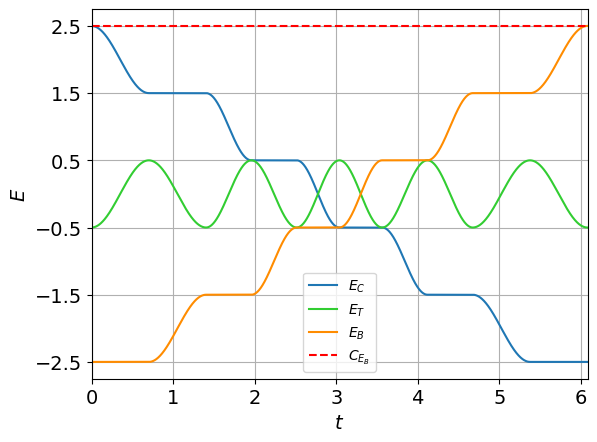

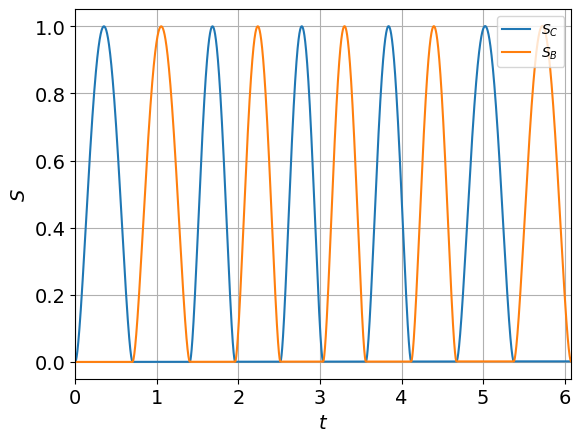

In [160]:
end = np.sum(end_p_list)
times = np.linspace(0,end,len(E_c))
print("in ", end, "time")
print("maximal energy battery: ", np.max(E_b))

plt.plot(times,E_c, label = "$E_C$")
plt.plot(times,E_i, label = "$E_T$", color = "limegreen")
plt.plot(times,E_b, label = "$E_B$ ", color = "darkorange")
plt.axhline(y=2.5, color='r', linestyle='--', label = "$C_{E_B}$")
plt.grid()
plt.xlabel("$t$",size = 14)
plt.ylabel("$E$", size = 14)
plt.xlim((0,6.08))
plt.xticks(fontsize=14)
plt.yticks(np.arange(-2.5,3,1),fontsize=14)
plt.legend()
plt.savefig("energy_trans_battery_515")
plt.show()

plt.plot(times,S_c,label="$S_C$")
plt.plot(times,S_b,label="$S_B$")
plt.xlabel("$t$", size = 14)
plt.xlim((0,6.08))
plt.ylabel("$S$", size=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.legend(loc = "upper right")
plt.savefig("entropy_trans_battery_515")
plt.show()

100-1-100

see CST_Dicke

# constant exchange

5-1-2

In [29]:
steps_pp = 0.001
end = math.pi**2
times = np.arange(0,end,steps_pp)

qb = CST_QB_Dicke(Nc=5,Nt=1,Nb=2,m=5,A1=1,A2=1)

psi_c = qb.Hc.eigenstates()[1][5]
psi_t = qb.Ht.eigenstates()[1][0]
psi_b = qb.Hb.eigenstates()[1][0]

psi = qt.tensor(psi_c,psi_t,psi_b).unit()

Ec_0 = np.real((psi.dag()*qb.Hc_N*psi).full()[0])
Et_0 = np.real((psi.dag()*qb.Ht_N*psi).full()[0])
Eb_0 = np.real((psi.dag()*qb.Hb_N*psi).full()[0])

Ec_list = [Ec_0]
Et_list = [Et_0]
Eb_list = [Eb_0]

states_results = []

results_c = qt.mesolve(qb.H,psi,times,[],e_ops =[qb.Hc_N],options=qt.Options(store_states=True))
results_t = qt.mesolve(qb.H,psi,times,[],e_ops =[qb.Ht_N],options=qt.Options(store_states=True))
results_b = qt.mesolve(qb.H,psi,times,[],e_ops =[qb.Hb_N],options=qt.Options(store_states=True))
    
states_results+=results_b.states
    
Ec_list.append(np.array(results_c.expect[0]))
Et_list.append(np.array(results_t.expect[0]))
Eb_list.append(np.array(results_b.expect[0]))
    
    
Ec_list = Ec_list[1:]
Et_list = Et_list[1:]
Eb_list = Eb_list[1:]

E_c = np.concatenate(Ec_list)
E_t = np.concatenate(Et_list)
E_b = np.concatenate(Eb_list)

S_c = []
S_b = []

for i in range(len(E_c)):
     
    rh0_c = (states_results[i].ptrace([0])).full()
    log_rh0_c = np.log2(rh0_c)
    log_rh0_c[np.where(log_rh0_c==float("-inf"))] = 0
    entropy_c = -qt.Qobj(rh0_c*log_rh0_c).tr()
    S_c.append(entropy_c)
    
    rh0_b = (states_results[i].ptrace([2])).full()
    log_rh0_b = np.log2(rh0_b)
    log_rh0_b[np.where(log_rh0_b==float("-inf"))] = 0
    entropy_b = -qt.Qobj(rh0_b*log_rh0_b).tr()
    S_b.append(entropy_b)

C:\Users\quiri\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: divide by zero encountered in log2
C:\Users\quiri\Anaconda3\lib\site-packages\ipykernel_launcher.py:54: RuntimeWarning: divide by zero encountered in log2


in  9.869604401089358 time
maximal energy battery:  0.6828265530723534


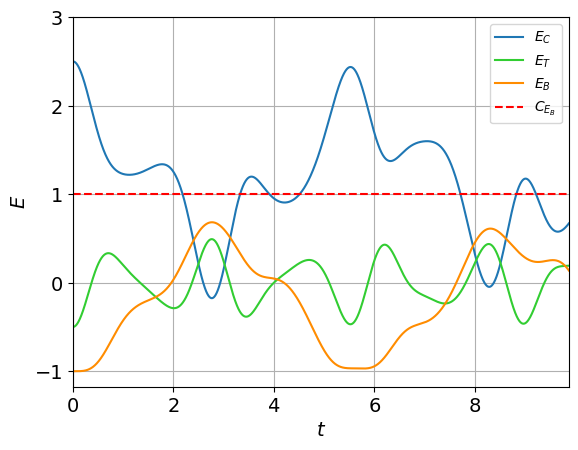

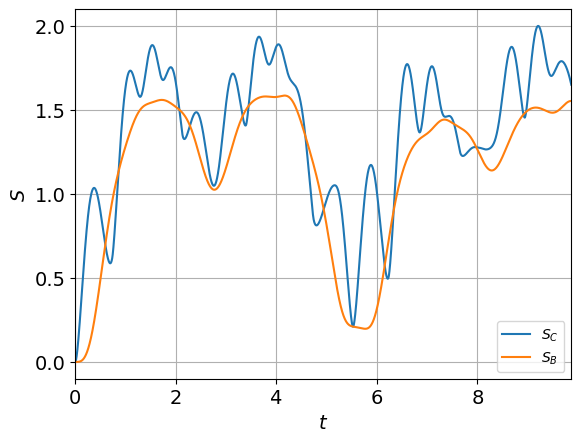

In [32]:
times = np.linspace(0,end,len(E_c))
print("in ", end, "time")
print("maximal energy battery: ", np.max(E_b))

plt.plot(times,E_c, label = "$E_C$")
plt.plot(times,E_t, label = "$E_T$", color = "limegreen")
plt.plot(times,E_b, label = "$E_B$ ", color = "darkorange")
plt.axhline(y=1, color='r', linestyle='--', label = "$C_{E_B}$")
plt.grid()
plt.xlabel("$t$",size = 14)
plt.ylabel("$E$", size = 14)
plt.xlim((0,end))
plt.xticks(np.arange(0,end,2),fontsize=14)
plt.yticks(np.arange(-1,3.5,1),fontsize=14)
plt.legend()
plt.savefig("energy_trans_battery_512_constant")
plt.show()

plt.plot(times,S_c,label="$S_C$")
plt.plot(times,S_b,label="$S_B$")
plt.xlabel("$t$", size = 14)
plt.xlim((0,end))
plt.ylabel("$S$", size=14)
plt.xticks(fontsize=14)
plt.yticks(np.arange(0,2.5,0.5),fontsize=14)
plt.grid()
plt.legend()
plt.savefig("entropy_trans_battery_512_constant")
plt.show()

2-1-2

In [33]:
steps_pp = 0.001
end = math.pi**2
times = np.arange(0,end,steps_pp)
N=2
qb = CST_QB_Dicke(Nc=N,Nt=1,Nb=N,m=N,A1=1,A2=1)

psi_c = qb.Hc.eigenstates()[1][N]
psi_t = qb.Ht.eigenstates()[1][0]
psi_b = qb.Hb.eigenstates()[1][0]

psi = qt.tensor(psi_c,psi_t,psi_b).unit()

Ec_0 = np.real((psi.dag()*qb.Hc_N*psi).full()[0])
Et_0 = np.real((psi.dag()*qb.Ht_N*psi).full()[0])
Eb_0 = np.real((psi.dag()*qb.Hb_N*psi).full()[0])

Ec_list = [Ec_0]
Et_list = [Et_0]
Eb_list = [Eb_0]
states_results = []

results_c = qt.mesolve(qb.H,psi,times,[],e_ops =[qb.Hc_N],options=qt.Options(store_states=True))
results_t = qt.mesolve(qb.H,psi,times,[],e_ops =[qb.Ht_N],options=qt.Options(store_states=True))
results_b = qt.mesolve(qb.H,psi,times,[],e_ops =[qb.Hb_N],options=qt.Options(store_states=True))
    
states_results+=results_b.states
    
Ec_list.append(np.array(results_c.expect[0]))
Et_list.append(np.array(results_t.expect[0]))
Eb_list.append(np.array(results_b.expect[0]))
    
    
Ec_list = Ec_list[1:]
Et_list = Et_list[1:]
Eb_list = Eb_list[1:]

E_c = np.concatenate(Ec_list)
E_t = np.concatenate(Et_list)
E_b = np.concatenate(Eb_list)

S_c = []
S_b = []

for i in range(len(E_c)):
     
    rh0_c = (states_results[i].ptrace([0])).full()
    log_rh0_c = np.log2(rh0_c)
    log_rh0_c[np.where(log_rh0_c==float("-inf"))] = 0
    entropy_c = -qt.Qobj(rh0_c*log_rh0_c).tr()
    S_c.append(entropy_c)
    
    rh0_b = (states_results[i].ptrace([2])).full()
    log_rh0_b = np.log2(rh0_b)
    log_rh0_b[np.where(log_rh0_b==float("-inf"))] = 0
    entropy_b = -qt.Qobj(rh0_b*log_rh0_b).tr()
    S_b.append(entropy_b)

C:\Users\quiri\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in log2
C:\Users\quiri\Anaconda3\lib\site-packages\ipykernel_launcher.py:53: RuntimeWarning: divide by zero encountered in log2


in  9.869604401089358 time
maximal energy battery:  0.8857465482332367


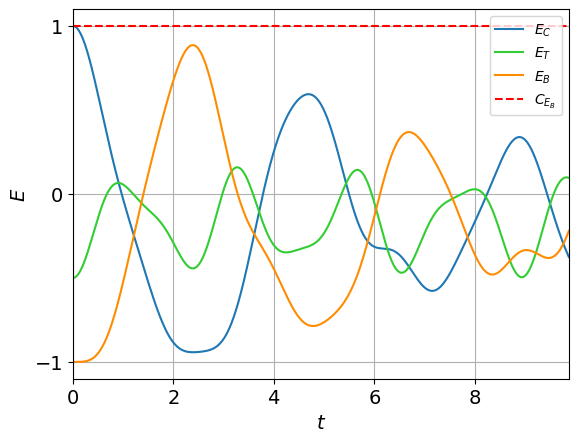

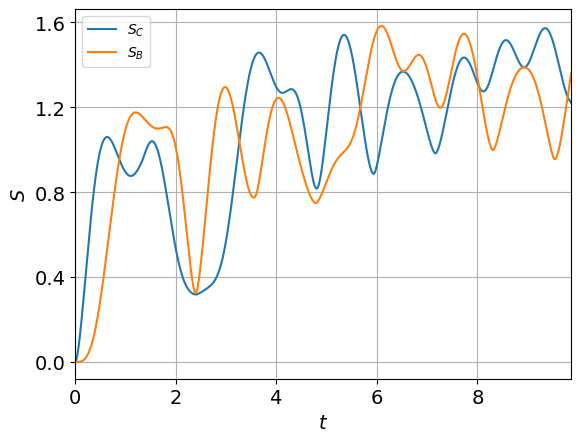

In [34]:

print("in ", end, "time")
print("maximal energy battery: ", np.max(E_b))

plt.plot(times,E_c, label = "$E_C$")
plt.plot(times,E_t, label = "$E_T$", color = "limegreen")
plt.plot(times,E_b, label = "$E_B$ ", color = "darkorange")
plt.axhline(y=1, color='r', linestyle='--', label = "$C_{E_B}$")
plt.grid()
plt.xlabel("$t$",size = 14)
plt.ylabel("$E$", size = 14)
plt.xlim((0,end))
plt.xticks(fontsize=14)
plt.yticks(np.arange(-1,2,1),fontsize=14)
plt.legend()
plt.savefig("energy_trans_battery_212_constant")
plt.show()

plt.plot(times,S_c,label="$S_C$")
plt.plot(times,S_b,label="$S_B$")
plt.xlabel("$t$", size = 14)
plt.xlim((0,end))
plt.ylabel("$S$", size=14)
plt.xticks(fontsize=14)
plt.yticks(np.arange(0,2,0.4),fontsize=14)
plt.grid()
plt.legend()
plt.savefig("entropy_trans_battery_212_constant")
plt.show()

3-1-3

In [35]:
steps_pp = 0.001
end = math.pi**2
times = np.arange(0,end,steps_pp)
N=3
qb = CST_QB_Dicke(Nc=N,Nt=1,Nb=N,m=N,A1=1,A2=1)

psi_c = qb.Hc.eigenstates()[1][N]
psi_t = qb.Ht.eigenstates()[1][0]
psi_b = qb.Hb.eigenstates()[1][0]

psi = qt.tensor(psi_c,psi_t,psi_b).unit()

Ec_0 = np.real((psi.dag()*qb.Hc_N*psi).full()[0])
Et_0 = np.real((psi.dag()*qb.Ht_N*psi).full()[0])
Eb_0 = np.real((psi.dag()*qb.Hb_N*psi).full()[0])

Ec_list = [Ec_0]
Et_list = [Et_0]
Eb_list = [Eb_0]
states_results = []

results_c = qt.mesolve(qb.H,psi,times,[],e_ops =[qb.Hc_N],options=qt.Options(store_states=True))
results_t = qt.mesolve(qb.H,psi,times,[],e_ops =[qb.Ht_N],options=qt.Options(store_states=True))
results_b = qt.mesolve(qb.H,psi,times,[],e_ops =[qb.Hb_N],options=qt.Options(store_states=True))
    
states_results+=results_b.states
    
Ec_list.append(np.array(results_c.expect[0]))
Et_list.append(np.array(results_t.expect[0]))
Eb_list.append(np.array(results_b.expect[0]))
    
    
Ec_list = Ec_list[1:]
Et_list = Et_list[1:]
Eb_list = Eb_list[1:]

E_c = np.concatenate(Ec_list)
E_t = np.concatenate(Et_list)
E_b = np.concatenate(Eb_list)

S_c = []
S_b = []

for i in range(len(E_c)):
     
    rh0_c = (states_results[i].ptrace([0])).full()
    log_rh0_c = np.log2(rh0_c)
    log_rh0_c[np.where(log_rh0_c==float("-inf"))] = 0
    entropy_c = -qt.Qobj(rh0_c*log_rh0_c).tr()
    S_c.append(entropy_c)
    
    rh0_b = (states_results[i].ptrace([2])).full()
    log_rh0_b = np.log2(rh0_b)
    log_rh0_b[np.where(log_rh0_b==float("-inf"))] = 0
    entropy_b = -qt.Qobj(rh0_b*log_rh0_b).tr()
    S_b.append(entropy_b)

C:\Users\quiri\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in log2
C:\Users\quiri\Anaconda3\lib\site-packages\ipykernel_launcher.py:53: RuntimeWarning: divide by zero encountered in log2


in  9.869604401089358 time
maximal energy battery:  1.282708460772293


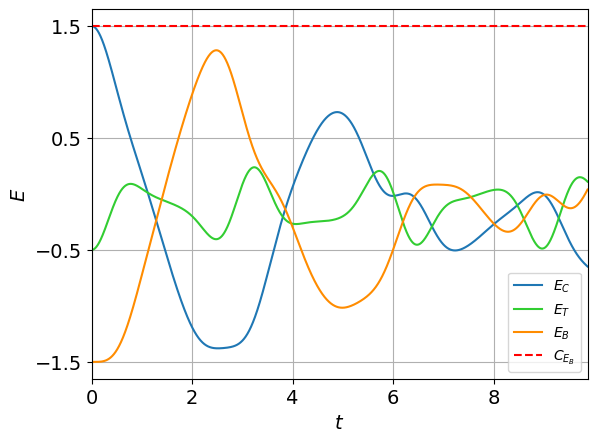

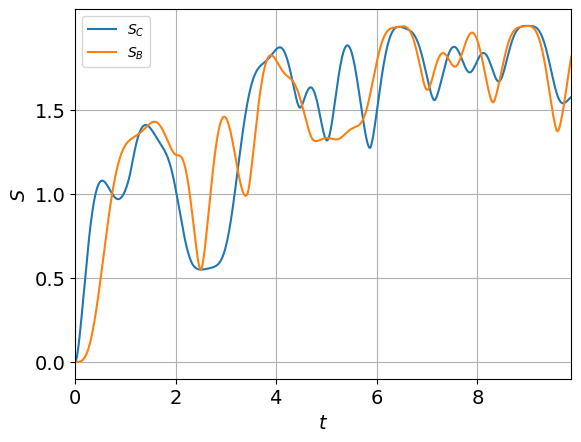

In [36]:
times = np.linspace(0,end,len(E_c))
print("in ", end, "time")
print("maximal energy battery: ", np.max(E_b))

plt.plot(times,E_c, label = "$E_C$")
plt.plot(times,E_t, label = "$E_T$", color = "limegreen")
plt.plot(times,E_b, label = "$E_B$ ", color = "darkorange")
plt.axhline(y=1.5, color='r', linestyle='--', label = "$C_{E_B}$")
plt.grid()
plt.xlabel("$t$",size = 14)
plt.ylabel("$E$", size = 14)
plt.xlim((0,end))
plt.xticks(fontsize=14)
plt.yticks(np.arange(-1.5,2.5,1),fontsize=14)
plt.legend()
plt.savefig("energy_trans_battery_313_constant")
plt.show()

plt.plot(times,S_c,label="$S_C$")
plt.plot(times,S_b,label="$S_B$")
plt.xlabel("$t$", size = 14)
plt.xlim((0,end))
plt.ylabel("$S$", size=14)
plt.xticks(fontsize=14)
plt.yticks(np.arange(0,2,0.5),fontsize=14)
plt.grid()
plt.legend()
plt.savefig("entropy_trans_battery_313_constant")
plt.show()

5-1-5

In [37]:
steps_pp = 0.001
times = np.arange(0,end,steps_pp)
N=5
qb = CST_QB_Dicke(Nc=N,Nt=1,Nb=N,m=N,A1=1,A2=1)

psi_c = qb.Hc.eigenstates()[1][N]
psi_t = qb.Ht.eigenstates()[1][0]
psi_b = qb.Hb.eigenstates()[1][0]

psi = qt.tensor(psi_c,psi_t,psi_b).unit()

Ec_0 = np.real((psi.dag()*qb.Hc_N*psi).full()[0])
Et_0 = np.real((psi.dag()*qb.Ht_N*psi).full()[0])
Eb_0 = np.real((psi.dag()*qb.Hb_N*psi).full()[0])

Ec_list = [Ec_0]
Et_list = [Et_0]
Eb_list = [Eb_0]
states_results = []

results_c = qt.mesolve(qb.H,psi,times,[],e_ops =[qb.Hc_N],options=qt.Options(store_states=True))
results_t = qt.mesolve(qb.H,psi,times,[],e_ops =[qb.Ht_N],options=qt.Options(store_states=True))
results_b = qt.mesolve(qb.H,psi,times,[],e_ops =[qb.Hb_N],options=qt.Options(store_states=True))
    
states_results+=results_b.states
    
Ec_list.append(np.array(results_c.expect[0]))
Et_list.append(np.array(results_t.expect[0]))
Eb_list.append(np.array(results_b.expect[0]))
    
    
Ec_list = Ec_list[1:]
Et_list = Et_list[1:]
Eb_list = Eb_list[1:]

E_c = np.concatenate(Ec_list)
E_t = np.concatenate(Et_list)
E_b = np.concatenate(Eb_list)

S_c = []
S_b = []

for i in range(len(E_c)):
     
    rh0_c = (states_results[i].ptrace([0])).full()
    log_rh0_c = np.log2(rh0_c)
    log_rh0_c[np.where(log_rh0_c==float("-inf"))] = 0
    entropy_c = -qt.Qobj(rh0_c*log_rh0_c).tr()
    S_c.append(entropy_c)
    
    rh0_b = (states_results[i].ptrace([2])).full()
    log_rh0_b = np.log2(rh0_b)
    log_rh0_b[np.where(log_rh0_b==float("-inf"))] = 0
    entropy_b = -qt.Qobj(rh0_b*log_rh0_b).tr()
    S_b.append(entropy_b)

C:\Users\quiri\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log2
C:\Users\quiri\Anaconda3\lib\site-packages\ipykernel_launcher.py:52: RuntimeWarning: divide by zero encountered in log2


in  9.869604401089358 time
maximal energy battery:  2.1193762004273995


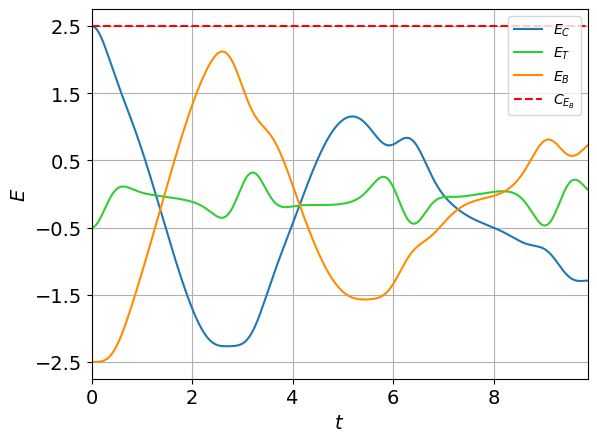

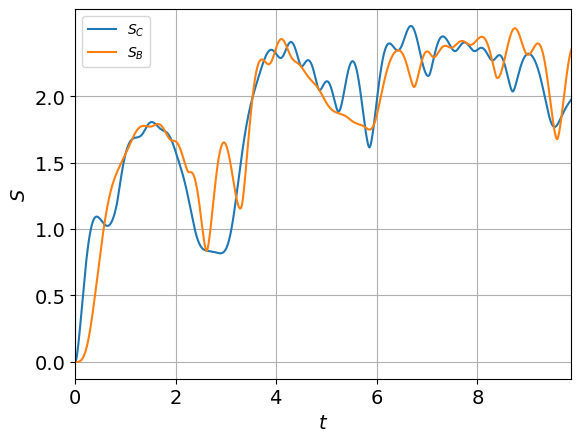

In [38]:
times = np.linspace(0,end,len(E_c))
print("in ", end, "time")
print("maximal energy battery: ", np.max(E_b))

plt.plot(times,E_c, label = "$E_C$")
plt.plot(times,E_t, label = "$E_T$", color = "limegreen")
plt.plot(times,E_b, label = "$E_B$ ", color = "darkorange")
plt.axhline(y=2.5, color='r', linestyle='--', label = "$C_{E_B}$")
plt.grid()
plt.xlabel("$t$",size = 14)
plt.ylabel("$E$", size = 14)
plt.xlim((0,end))
plt.xticks(fontsize=14)
plt.yticks(np.arange(-2.5,3,1),fontsize=14)
plt.legend()
plt.savefig("energy_trans_battery_515_constant")
plt.show()

plt.plot(times,S_c,label="$S_C$")
plt.plot(times,S_b,label="$S_B$")
plt.xlabel("$t$", size = 14)
plt.xlim((0,end))
plt.ylabel("$S$", size=14)
plt.xticks(fontsize=14)
plt.yticks(np.arange(0,2.5,0.5),fontsize=14)
plt.grid()
plt.legend()
plt.savefig("entropy_trans_battery_515_constant")
plt.show()

100-1-100

In [39]:
steps_pp = 0.01

times = np.arange(0,end,steps_pp)
N=100
qb = CST_QB_Dicke(Nc=N,Nt=1,Nb=N,m=N,A1=1,A2=1)

psi_c = qb.Hc.eigenstates()[1][N]
psi_t = qb.Ht.eigenstates()[1][0]
psi_b = qb.Hb.eigenstates()[1][0]

psi = qt.tensor(psi_c,psi_t,psi_b).unit()

Ec_0 = np.real((psi.dag()*qb.Hc_N*psi).full()[0])
Et_0 = np.real((psi.dag()*qb.Ht_N*psi).full()[0])
Eb_0 = np.real((psi.dag()*qb.Hb_N*psi).full()[0])

Ec_list = [Ec_0]
Et_list = [Et_0]
Eb_list = [Eb_0]
states_results = []

results_c = qt.mesolve(qb.H,psi,times,[],e_ops =[qb.Hc_N],options=qt.Options(store_states=True))
results_t = qt.mesolve(qb.H,psi,times,[],e_ops =[qb.Ht_N],options=qt.Options(store_states=True))
results_b = qt.mesolve(qb.H,psi,times,[],e_ops =[qb.Hb_N],options=qt.Options(store_states=True))
    
states_results+=results_b.states
    
Ec_list.append(np.array(results_c.expect[0]))
Et_list.append(np.array(results_t.expect[0]))
Eb_list.append(np.array(results_b.expect[0]))
    
    
Ec_list = Ec_list[1:]
Et_list = Et_list[1:]
Eb_list = Eb_list[1:]

E_c = np.concatenate(Ec_list)
E_t = np.concatenate(Et_list)
E_b = np.concatenate(Eb_list)



In [40]:
S_c = []
S_b = []

for i in range(len(E_c)):

    rh0_c = (states_results[i].ptrace([0])).full()
    log_rh0_c = np.log2(rh0_c)
    log_rh0_c[np.where(log_rh0_c==float("-inf"))] = 0
    entropy_c = -qt.Qobj(rh0_c*log_rh0_c).tr()
    S_c.append(entropy_c)
    
    rh0_b = (states_results[i].ptrace([2])).full()
    log_rh0_b = np.log2(rh0_b)
    log_rh0_b[np.where(log_rh0_b==float("-inf"))] = 0
    entropy_b = -qt.Qobj(rh0_b*log_rh0_b).tr()
    S_b.append(entropy_b)

C:\Users\quiri\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log2
  import sys
C:\Users\quiri\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log2
  del sys.path[0]


in  9.869604401089358 time
maximal energy battery:  48.446760993624125


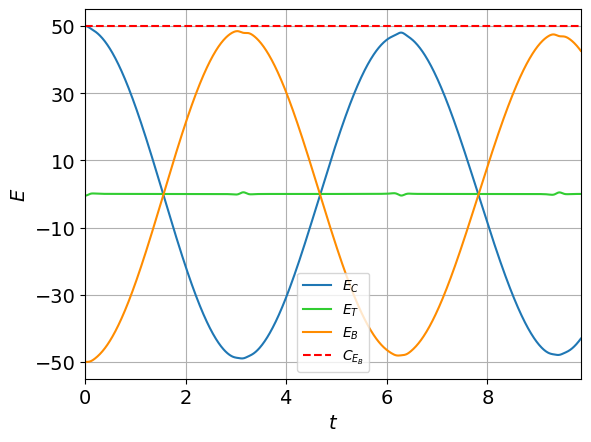

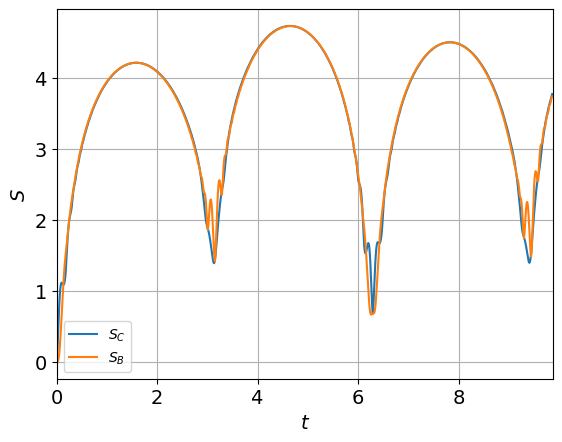

In [41]:

print("in ", end, "time")
print("maximal energy battery: ", np.max(E_b))

plt.plot(times,E_c, label = "$E_C$")
plt.plot(times,E_t, label = "$E_T$", color = "limegreen")
plt.plot(times,E_b, label = "$E_B$", color = "darkorange")
plt.axhline(y=50, color='r', linestyle='--', label = "$C_{E_B}$")
plt.grid()
plt.xlabel("$t$",size = 14)
plt.ylabel("$E$", size = 14)
plt.xlim((0,end))
plt.xticks(np.arange(0,end,2),fontsize=14)
plt.yticks(np.arange(-50,60,20),fontsize=14)
plt.legend()
plt.savefig("energy_trans_battery_1001100_constant")
plt.show()

plt.plot(times,S_c,label="$S_C$")
plt.plot(times,S_b,label="$S_B$")
plt.xlabel("$t$", size = 14)
plt.xlim((0,end))
plt.ylabel("$S$", size=14)
plt.xticks(np.arange(0,end,2),fontsize=14)
plt.yticks(np.arange(0,5,1),fontsize=14)
plt.grid()
plt.legend()
plt.savefig("entropy_trans_battery_1001100_constant")
plt.show()

time

In [82]:
end_p_list = []

for i in range(5):
    qb_dick = QuantumBattery_Dicke(Nb=1,Nc=5,m=5-i,Bz=1,A=1,delta=0,h=1,intern =0)
    dE = abs(qb_dick.H.eigenenergies()[0]-qb_dick.H.eigenenergies()[1])
    end_p_list+=[round(math.pi/dE,3)]

3.0380000000000003


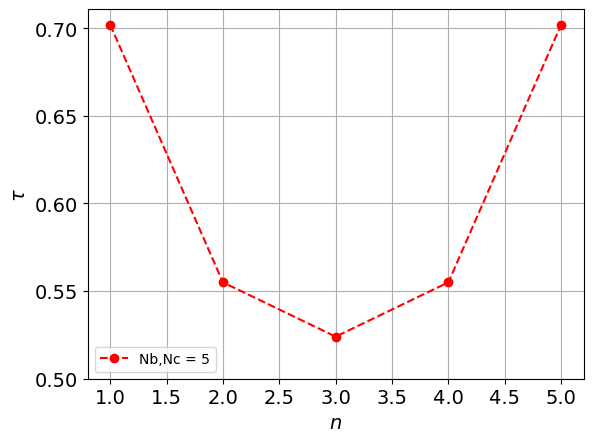

In [83]:
plt.plot(range(1,6),end_p_list, "--o", color = "red", label = "Nb,Nc = 5")
plt.xlabel("$n$", size = 14)
plt.ylabel(r"$\tau$", size = 14)
plt.xticks(fontsize=14)
plt.yticks(np.arange(0.5,0.75,0.05),fontsize=14)
plt.legend()
plt.grid()
plt.savefig("T_switch_515")
print(sum(end_p_list))

In [84]:
end_p_list = []

for i in range(100):
    qb_dick = QuantumBattery_Dicke(Nb=1,Nc=100,m=100-i,Bz=1,A=1,delta=0,h=1,intern =0)
    dE = abs(qb_dick.H.eigenenergies()[0]-qb_dick.H.eigenenergies()[1])
    end_p_list+=[round(math.pi/dE,3)]

4.482


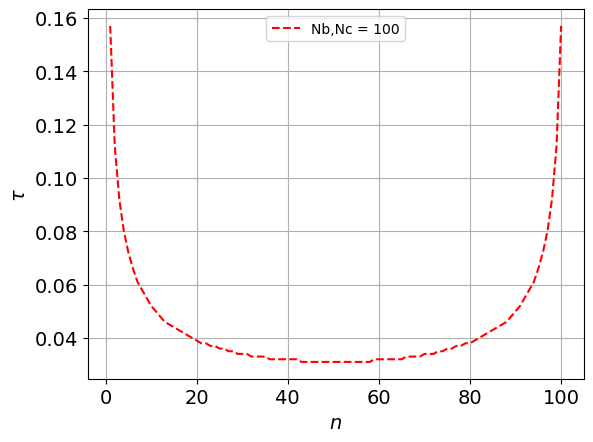

In [85]:
plt.plot(range(1,101),end_p_list,'--',  color = "red", label = "Nb,Nc = 100")
plt.xlabel("$n$", size = 14)
plt.ylabel(r"$\tau$", size = 14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()
plt.grid()
plt.savefig("T_switch_100_1_100")
print(sum(end_p_list))

In [86]:
T_total = []
N = 500
for k in range(2,N+1):
    end_p_list = []
    for i in range(k):
        qb_dick = QuantumBattery_Dicke(Nb=1,Nc=k,m=k-i,Bz=1,A=1,delta=0,h=1,intern =0)
        dE = abs(qb_dick.H.eigenenergies()[0]-qb_dick.H.eigenenergies()[1])
        end_p_list+=[math.pi/dE]
    T_total.append(sum(end_p_list)*2)

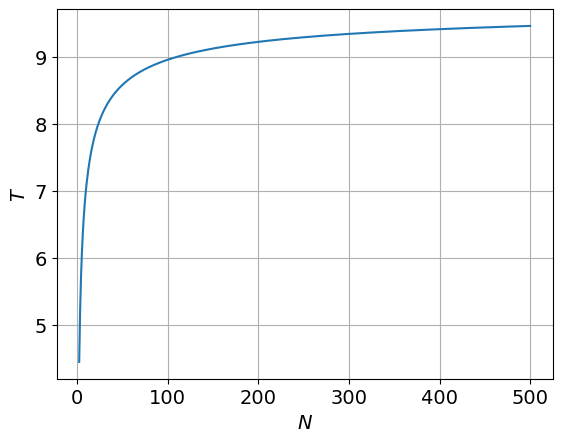

In [87]:

plt.ylabel("$T$", size = 14)
plt.xlabel("$N$", size = 14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
# plt.xscale("log")
plt.plot(range(2,N+1),T_total)
plt.savefig("time_charging_transmitter_battery")

In [2]:
def u_(Nb,Nc,m,j):
    u = np.sqrt(j*(Nb-j+1)*(Nc-m+j)*(m-j+1))
    return u

def T_(Nb,Nc,m):
    tau_i = []
    N = min(m,Nb)
    for k in range(1,N+1):
        u1 = u_(1,Nc,m+1-k,1)
        tau_i.append(math.pi/(2*u1))
        
    for k in range(1,N+1):
        u2 = u_(1,Nb,Nb+1-k,1)
        tau_i.append(math.pi/(2*u2))

    T = np.sum(tau_i)
    return T

In [3]:
T_(5,5,5)

6.07856491269207

In [39]:
n=750
x = np.arange(1,n)

T = []
for i in x:
    T.append(T_(i,i,i))

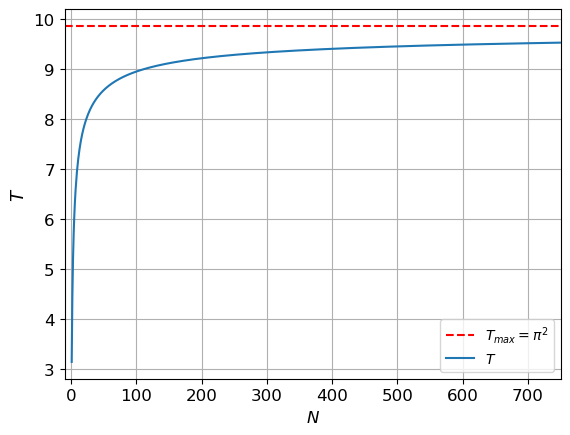

In [43]:
plt.ylabel("$T$", size = 13)
plt.xlabel("$N$", size = 12)
plt.axhline(y=math.pi**2, color='r', linestyle='--', label = "$T_{max}=\pi^2$")
plt.xticks(fontsize=12)

plt.xlim((-10,750))
plt.yticks(fontsize=12)
plt.grid()
plt.plot(x,T, label="$T$")
plt.legend()
plt.savefig("time_charging_transmitter_battery")

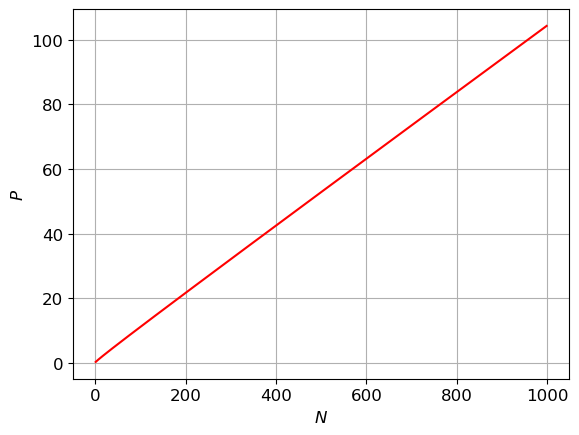

In [33]:
P = x/T

plt.ylabel("$P$", size = 12)
plt.xlabel("$N$", size = 12)
plt.xticks(fontsize=12)
#plt.xlim((-10,500))
plt.yticks(fontsize=12)

plt.grid()

plt.plot(x,P, color = "red")
plt.savefig("power_")

In [26]:
P[2]-P[1]

0.12694303721489136

In [25]:
(P[498]-P[0])/498

0.10529032397842371

POWER